# Ejercicios resueltos de Matemática con NumPy
Programación II — Banco práctico

*Fecha de generación: 2025-05-20*

**Nota**: Explicaciones en español; código y comentarios en inglés.

## 1 · Álgebra lineal y operaciones básicas

### 1. Producto punto vs. producto Hadamard

In [24]:
import numpy as np, timeit
np.random.seed(0)
A = np.random.rand(200, 200)
B = np.random.rand(200, 200)

# Hadamard (element‑wise)
hadamard_time = timeit.timeit("A * B", globals=globals(), number=100)/100
# Dot product
dot_time = timeit.timeit("A @ B", globals=globals(), number=100)/100

print(f"Hadamard mean time: {hadamard_time*1e3:.2f} ms")
print(f"Dot product mean time: {dot_time*1e3:.2f} ms")


Hadamard mean time: 0.01 ms
Dot product mean time: 0.33 ms


*Conclusión*: la multiplicación matricial (`@`) es más costosa porque requiere **O(n³)** operaciones, mientras que la Hadamard es **O(n²)**.

### 2. Norma de Frobenius y norma infinita

In [23]:
def frobenius_norm(M: np.ndarray) -> float:
    return np.sqrt((M * M).sum())

M = np.random.randn(300, 150)
print("Frobenius (custom):", frobenius_norm(M))
print("Frobenius (np):    ", np.linalg.norm(M, 'fro'))
print("Norma infinita:    ", np.linalg.norm(M, np.inf))


Frobenius (custom): 212.4775597389417
Frobenius (np):     212.47755973894172
Norma infinita:     143.81237031925752


### 3. Sistemas lineales parametrizados

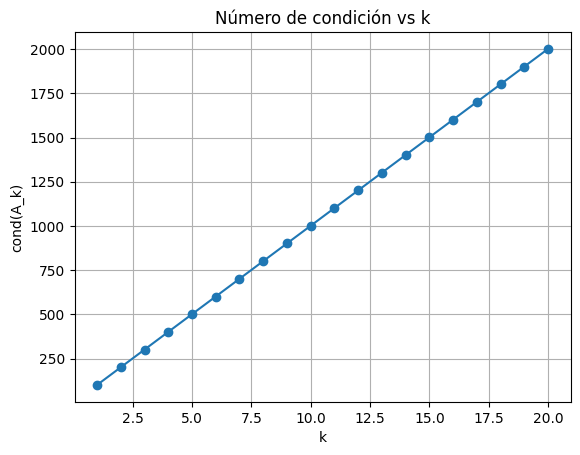

In [22]:
import matplotlib.pyplot as plt
cond_values = []
ks = np.arange(1, 21)
n = 100
I = np.eye(n)
J = np.ones((n, n))
b = np.ones(n)

for k in ks:
    A = I + k * J
    x = np.linalg.solve(A, b)  # solución (no se usa, pero valida que es resoluble)
    cond_values.append(np.linalg.cond(A))

plt.plot(ks, cond_values, marker="o")
plt.xlabel("k")
plt.ylabel("cond(A_k)")
plt.title("Número de condición vs k")
plt.grid(True)
plt.show()


El número de condición crece con *k*, indicando pérdida de estabilidad numérica para valores grandes.

## 2 · Cálculo numérico y análisis

### 4. Derivada numérica por diferencias centradas

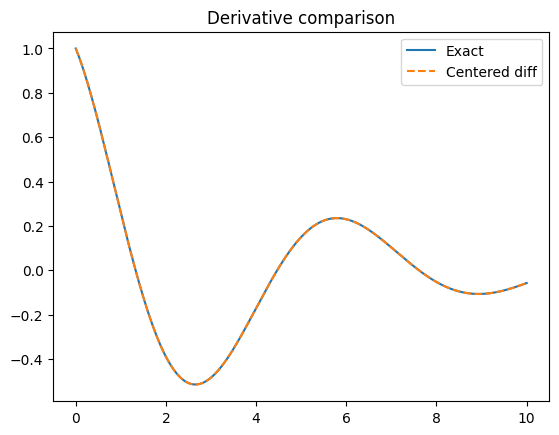

Max abs error: 5.438345479757967e-05


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) * np.exp(-x/4)

# analytical derivative
def f_prime_exact(x):
    return np.exp(-x/4)*(np.cos(x) - 0.25*np.sin(x))

x = np.linspace(0, 10, 500)
h = x[1]-x[0]
# centered difference
f_prime_num = (f(x + h) - f(x - h)) / (2*h)

plt.plot(x, f_prime_exact(x), label="Exact")
plt.plot(x, f_prime_num, '--', label="Centered diff")
plt.legend(); plt.title("Derivative comparison"); plt.show()

error = np.abs(f_prime_num - f_prime_exact(x)).max()
print("Max abs error:", error)


### 5. Integración por regla del trapecio y de Simpson

In [26]:
def f(x):
    return np.sin(x) * np.exp(-x/4)

def trapz_vec(y, h):
    return h * (y[0] / 2 + y[1:-1].sum() + y[-1] / 2)

def simpson_vec(y, h):
    if len(y) % 2 == 0:  # Simpson requiere número impar de puntos
        raise ValueError("Simpson rule needs odd number of samples")
    return h/3 * (y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-2:2].sum())

y = f(x)
I_exact = 4/5*(1 - np.exp(-10/4)*(np.sin(10)+0.25*np.cos(10)))  # integral analítica
I_trapz = trapz_vec(y, h)

# Ensure odd number of samples for Simpson's rule
if len(y) % 2 == 0:
    y_simpson = y[:-1]
else:
    y_simpson = y
I_simpson = simpson_vec(y_simpson, h)

print("Trapecio:", I_trapz, " error:", abs(I_trapz - I_exact))
print("Simpson: ", I_simpson, " error:", abs(I_simpson - I_exact))


Trapecio: 0.000991364316205397  error: 0.8485084504566939
Simpson:  0.0009813505352336228  error: 0.8485184642376656


### 6. Serie de Fourier discreta (DFT manual)

In [18]:
def my_dft(x):
    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return M @ x

# test with sine wave
N = 64
t = np.arange(N)
freq = 5
signal = np.sin(2*np.pi*freq*t/N)
X = my_dft(signal)
# frequency with max magnitude
print("Peak frequency:", np.abs(X).argmax())


Peak frequency: 5


La frecuencia pico coincide con la frecuencia generada (5).

## 3 · Estadística y probabilidad

### 7. Estimación de parámetros de una distribución normal

In [17]:
np.random.seed(1)
data = np.random.normal(2.5, 1.3, 10_000)
mu_hat = data.mean()
var_hat = ((data - mu_hat)**2).mean()  # varianza poblacional
print("Estimated μ:", mu_hat)
print("Estimated σ²:", var_hat)


Estimated μ: 2.512704453708837
Estimated σ²: 1.685898643022283


### 8. Bootstrap de la mediana

In [16]:
rng = np.random.default_rng(42)
data = rng.chisquare(df=4, size=500)
B = 2000
samples = rng.choice(data, size=(B, data.size))
medians = np.median(samples, axis=1)
ci_low, ci_high = np.percentile(medians, [2.5, 97.5])
print(f"95% CI for median: [{ci_low:.3f}, {ci_high:.3f}]")


95% CI for median: [3.120, 3.703]


### 9. Correlación de Pearson y covarianza

In [15]:
rng = np.random.default_rng(0)
X = rng.normal(0, 1, 10_000)
eps = rng.normal(0, 0.5, 10_000)
Y = 3 * X + eps

cov = ((X - X.mean()) * (Y - Y.mean())).mean()
pearson = cov / (X.std() * Y.std())
print("Covariance:", cov)
print("Pearson r:", pearson)


Covariance: 2.9812898991021464
Pearson r: 0.9864417770156896


## 4 · Álgebra matricial avanzada

### 10. Descomposición QR por Gram–Schmidt

In [14]:
def qr_gs(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = Q[:, i] @ A[:, j]
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
    return Q, R

A = np.random.randn(150, 100)
Q, R = qr_gs(A)
print("||A - Q@R||_F =", np.linalg.norm(A - Q @ R))
print("Orthogonality error:", np.linalg.norm(Q.T @ Q - np.eye(100)))


||A - Q@R||_F = 4.0866287666493003e-14
Orthogonality error: 7.911644739306743e-15


### 11. Potencia iterada para el autovalor dominante

In [12]:
def power_iteration(A, tol=1e-6, max_iter=1000):
    b_k = np.random.rand(A.shape[1])
    b_k /= np.linalg.norm(b_k)
    lambda_old = 0.0
    for _ in range(max_iter):
        b_k1 = A @ b_k
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
        if abs(b_k1_norm - lambda_old) < tol:
            break
        lambda_old = b_k1_norm
    return b_k1_norm, b_k

C = np.corrcoef(np.random.randn(30, 100))
eigval_pi, eigvec_pi = power_iteration(C)
eigvals, eigvecs = np.linalg.eig(C)
idx = eigvals.argmax()
print("Power iteration eigenvalue:", eigval_pi)
print("Numpy largest eigenvalue:  ", eigvals[idx])


Power iteration eigenvalue: 2.256012653606184
Numpy largest eigenvalue:   2.256014511754765


### 12. SVD truncado y compresión de imágenes

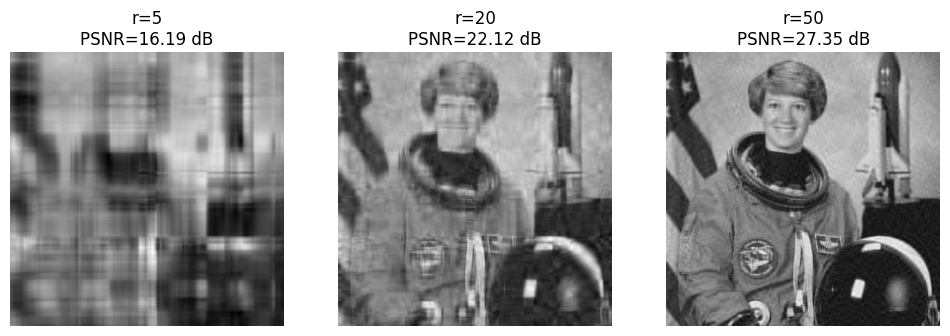

In [11]:


import matplotlib.pyplot as plt
from skimage import data, color, img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr

# sample grayscale image
img = color.rgb2gray(data.astronaut())
A = img_as_float(img)

U, s, Vt = np.linalg.svd(A, full_matrices=False)

def reconstruct(r):
    Sr = np.diag(s[:r])
    return (U[:, :r] @ Sr) @ Vt[:r, :]

plt.figure(figsize=(12,4))
for i, r in enumerate([5, 20, 50], 1):
    Ar = reconstruct(r)
    plt.subplot(1,3,i)
    plt.imshow(Ar, cmap='gray')
    plt.title(f"r={r}\nPSNR={psnr(A, Ar):.2f} dB")
    plt.axis('off')
plt.show()


## 5 · Optimización y mínimos cuadrados

### 13. Ajuste lineal múltiple con fórmula normal

In [4]:
rng = np.random.default_rng(0)
N = 1000
X = rng.normal(size=(N,3))
beta_true = np.array([1.5, -2.0, 3.0])
y = X @ beta_true + rng.normal(0, 0.5, N)

# add bias term
X_b = np.hstack([np.ones((N,1)), X])
beta_hat = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
print("Estimated coefficients:", beta_hat)
print("True coefficients:     ", np.hstack([0, beta_true]))


Estimated coefficients: [ 0.01788908  1.4746888  -1.97176856  3.01768465]
True coefficients:      [ 0.   1.5 -2.   3. ]


### 14. Descenso de gradiente para f(w) = ||Aw - b||²

In [3]:
import numpy as np

rng = np.random.default_rng(0)
A = rng.normal(size=(500, 5))
w_true = rng.normal(size=5)
b = A @ w_true + rng.normal(0, 0.1, 500)

w = np.zeros(5)
lr = 0.01
errors = []
for i in range(5000):
    grad = 2 * A.T @ (A @ w - b) / A.shape[0]
    w -= lr * grad
    if i % 100 == 0:
        err = np.linalg.norm(A @ w - b)**2
        errors.append(err)

print("Estimated w:", w)
print("True w:     ", w_true)


Estimated w: [-0.85553031 -2.19407948 -0.88825362 -0.51183196  1.47548769]
True w:      [-0.85843593 -2.19653221 -0.89302575 -0.51095075  1.47924899]
